In [1]:
using DifferentialEquations
using LinearAlgebra
using Plots
using FileIO, JLD2
using LaTeXStrings

In [2]:
include("Solvers.jl")
include("PlotFunctions.jl")
include("UsefulFunctions.jl")
include("PointGenerators.jl")

points_on_sphere (generic function with 1 method)

In [3]:
function avg_energies(init_points, p, T, N, solvers)
    num_solvers = length(solvers)
    energies = zeros(num_solvers, N+1)
    for i = 1:num_solvers
        M = points_solutions_matrix(p,Δt,N::Int64,init_points,solvers[i])
        energies[i,:] = sum(M.^2/n,dims=1)
    end
    return energies
end

function plot_energies(energies, solvers, T; palette=:default, lines=[:solid])
    num_solvers = length(solvers)
    line_styles = length(lines)
    Δ = Integer(N/1000)
    x_vals = [0, 200, 400, 600, 800, 1000]
    x_ticks = [string(Int(x/(1000/T))) for x in x_vals]
    plt = plot(palette=palette,yaxis=:log, xticks=(x_vals,x_ticks), ylab=L"\textrm{Energy}",xlab=L"\textrm{Time}",xtickfontsize=8,ytickfontsize=8,legend=:topright)
    for i = 1:num_solvers
        solver = solvers[i]
        energy = energies[i,:][1:Δ:end]
        plot!(plt,energy,label=latexstring("\\","textrm{", solver, "}"),line=(1,lines[(i-1)%line_styles+1]))
    end
    display(plt)
end

plot_energies (generic function with 1 method)

In [124]:
function plot_energies_fixpoint(energies, solvers, T; palette=:default, lines=[:solid])
    num_solvers = length(solvers)
    line_styles = length(lines)
    v = Integer(N/T)
    plt = plot(palette=palette, ylab=L"\textrm{Energy}",xlab=L"\textrm{Time}",legend=:topright)
    for j = 1:num_solvers
        solver = solvers[j]
        maxenergy = zeros(1,T)
        for i=1:Integer(N/v)
            maxenergy[1,i] = maximum(broadcast(abs,energies[j,v*(i-1)+1:v*i]))
        end
        plot!(plt,maxenergy',label=latexstring("\\","textrm{", solver, "}"),line=(1,lines[(j-1)%line_styles+1]))
    end
    display(plt)
end

plot_energies_fixpoint (generic function with 1 method)

In [24]:
lines = [:dash, :solid, :dashdot, :dashdotdot, :dot]
;
darkblue = RGBA(8/255,14/255,60/255,1)
blue = RGBA(43/255,44/255,170/255,1)
orange = RGBA(211/255,84/255,0,1)
red = RGBA(1,0,0,1)
darkred = RGBA(140/255,0,0,1)
colors = [blue,darkblue, darkred, red,  orange]

In [103]:
r = 100
Δt = 0.001
T = 50
N = Integer(T/Δt)
θ, β = 10, 8/3
;
solvers = [EulerForward, RK4, DTM, Rodas5, RadauIIA5]
;
n = 10
init_points = points_on_sphere(n, r)
;

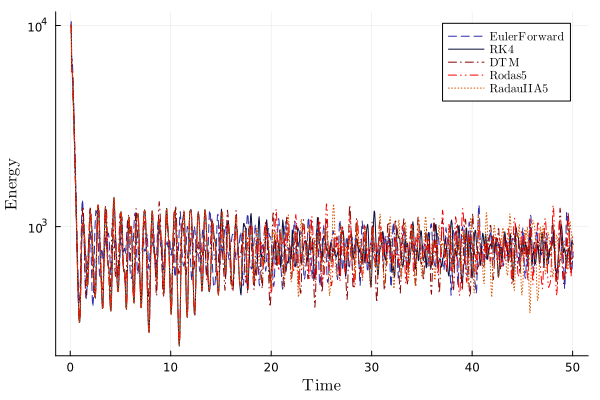

"c:\\Users\\Vilmer\\Julia\\Lorentz-System-Degree-Project\\Trying-to-clean-up-Numerical-Solvers\\plots\\energy\\energy_μ=28.pdf"

In [104]:
μ = 28
p = [θ, μ, β]
energies = avg_energies(init_points, p, T, N, solvers)
;
plot_energies(energies, solvers, T, palette=palette(colors), lines=lines)
savefig(string("plots","\\","energy","\\","energy_μ=",μ,".pdf"))

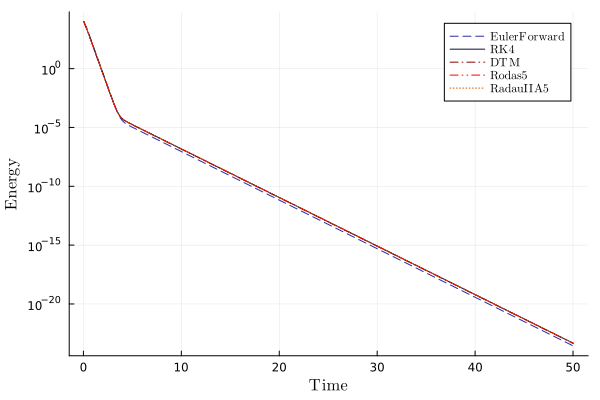

"c:\\Users\\Vilmer\\Julia\\Lorentz-System-Degree-Project\\Trying-to-clean-up-Numerical-Solvers\\plots\\energy\\energy_μ=0.5.pdf"

In [105]:
μ = 0.5
p = [θ, μ, β]
energies = avg_energies(init_points, p, T, N, solvers)
;
plot_energies(energies, solvers, T, palette=palette(colors), lines=lines)
savefig(string("plots","\\","energy","\\","energy_μ=",μ,".pdf"))

In [112]:
μ = 23.5
p = [θ, μ, β]
fixpoint = fixpoints(p)
;
solvers = [EulerForward, RK4, DTM, Rodas5, RadauIIA5]
;

In [114]:
fxpoint = fixpoint[1]
n=10
r=1;
init_points = points_on_sphere(n, r,center=fxpoint)

1×3 Matrix{Float64}:
 7.74597  7.74597  22.5

In [116]:
energies = avg_energies(init_points, p, T, N, solvers)
;

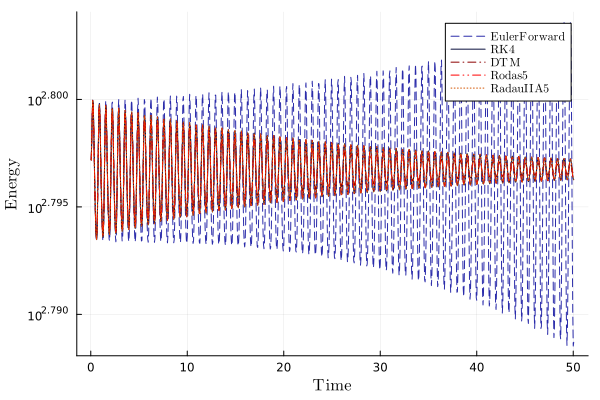

In [117]:
plot_energies(energies, solvers, T, palette=palette(colors), lines=lines)

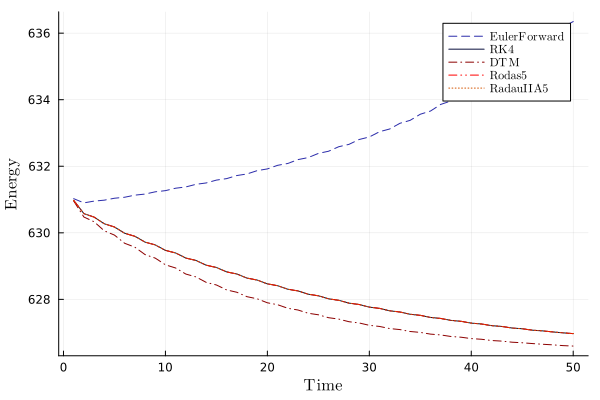

In [121]:
plot_energies_fixpoint(energies, solvers, T, palette=palette(colors), lines=lines)

In [122]:
savefig(string("plots","\\","energy","\\","energy_fixpoint",".pdf"))

"c:\\Users\\Vilmer\\Julia\\Lorentz-System-Degree-Project\\Trying-to-clean-up-Numerical-Solvers\\plots\\energy\\energy_fixpoint.pdf"

In [88]:
fxpoint = fixpoint[2]
n=10
r=1;
init_points = points_on_sphere(n, r,center=fxpoint)

3×10 Matrix{Float64}:
 -8.34176  -7.45606  -7.14482  -7.47162  …  -7.12977  -8.29648  -8.35109
 -7.38311  -8.43513  -6.95119  -8.6939      -6.98786  -8.09153  -7.74432
 23.2165   23.1641   22.5833   22.6617      22.2865   21.7401   23.2961

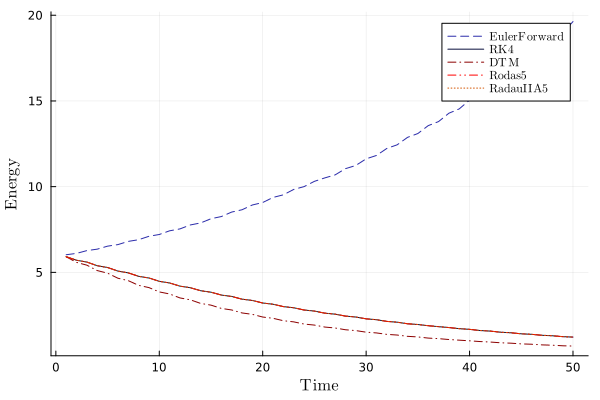

In [89]:
energies = avg_energies(init_points, p, T, N, solvers)
;
plot_energies_fixpoint(energies, solvers, T, palette=palette(colors), lines=lines)

In [130]:
savefig(string("plots","\\","energy","\\","energy_fixpoint18",".pdf"))

"c:\\Users\\Vilmer\\Julia\\Lorentz-System-Degree-Project\\Trying-to-clean-up-Numerical-Solvers\\plots\\energy\\energy_fixpoint18.pdf"

In [5]:
r = 100
Δt = 0.001
T = 50
N = Integer(T/Δt)
θ, β = 10, 8/3
;
solvers = [EulerForward, RK4, DTM, Rodas5, RadauIIA5]
;
n = 10
init_points = points_on_sphere(n, r)
;

In [14]:
μ = 28
p = [θ, μ, β]
energies = avg_energies_deviation(init_points, p, T, N, solvers)
display(energies)


1×50001 Matrix{Float64}:
 10000.0  9869.35  9746.41  9631.03  …  787.92  788.102  788.311  788.549

"h"

"h"

"h"

"h"

"h"

5×50001 Matrix{Float64}:
 0.0   8.264       16.2156      …    60.3583    59.3359    58.2753
 0.0  -2.72705e-6  -5.44372e-6     -139.678   -140.817   -141.985
 0.0  -2.68657     -5.26514          94.3413    95.1756    95.9805
 0.0   7.86604e-8   1.47156e-7      -97.6875  -100.804   -101.041
 0.0  -7.60566e-6  -1.11219e-5      -81.8944   -82.0947   -82.3321

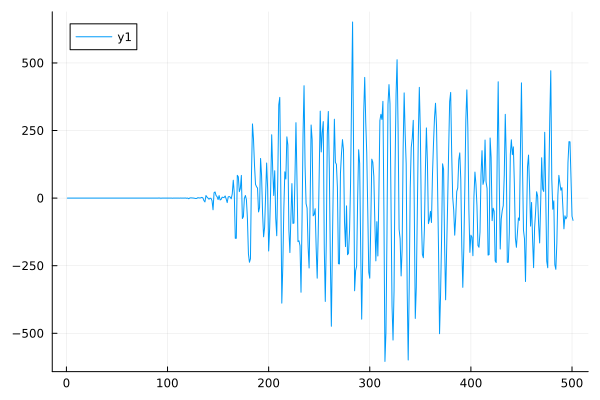

In [19]:
plot(energies[5,1:100:end])

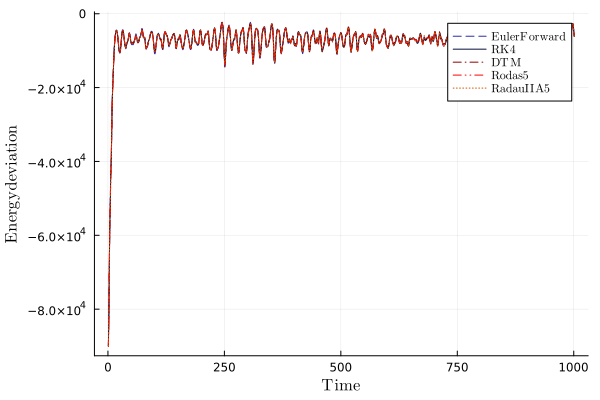

In [37]:
plot_energies_deviation(energies,solvers,T, palette=palette(colors), lines=lines)